# Mole Transfer Learning

In [1]:
import swat
from dlpy.applications import *
%matplotlib inline

In [2]:
s = swat.CAS('localhost', '5570', '', '')

## Load and View Images

In [5]:
from dlpy.images import ImageTable
train = ImageTable.load_files(s, path = '/data/viya47docker/ankram_data/mole_data/sample/train')     
test = ImageTable.load_files(s, path = '/data/viya47docker/ankram_data/mole_data/sample/test')

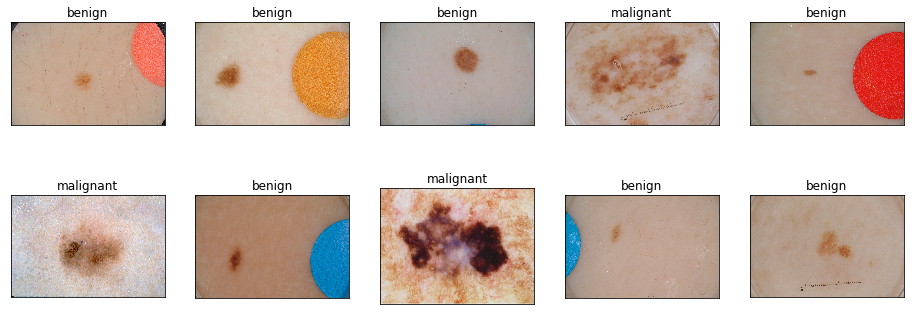

In [7]:
train.show(nimages=10, ncol=5, randomize=True)

In [8]:
train.label_freq

,Level,Frequency
benign,1,500
malignant,2,500


In [10]:
train.image_summary

jpg                  1000
minWidth              639
maxWidth             6708
minHeight             542
maxHeight            4499
meanWidth         3198.33
meanHeight         2168.7
mean1stChannel    129.582
min1stChannel           0
max1stChannel         255
mean2ndChannel    145.294
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    177.526
min3rdChannel           0
max3rdChannel         255
dtype: object

In [11]:
# Resize Images
train.resize(width=224, height=224, inplace=True)
test.resize(width=224, height=224, inplace=True)

## Train Model

In [22]:
# Use Popular VGG16 Model
model_vgg16 = VGG16(
    s,
    model_table='VGG16',
    n_classes=2,
    n_channels=3,
    width=224,
    height=224,
    scale=1,
    offsets=(103.939, 116.779, 123.68),
    pre_train_weight=True, 
    pre_train_weight_file='/data/viya47docker/ankram_data/mole_data/VGG16_WEIGHTS.sashdat',
    include_top=False #1000 classes otherwise)

NOTE: Model weights attached successfully!
NOTE: Model table is attached successfully!
NOTE: Model is named to "vgg16" according to the model name in the table.


In [15]:
model_vgg16.print_summary() # VGG16 b/c 16 Layers with Weights

*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| data(Input)      |     None      |  None  |    None    |  (224, 224, 3)  |        0 / 0         |
| conv1_1(Convo.)  |    (3, 3)     |   1    | Rectifier  | (224, 224, 64)  |      1728 / 64       |
| conv1_2(Convo.)  |    (3, 3)     |   1    | Rectifier  | (224, 224, 64)  |      36864 / 64      |
| pool1(Pool)      |    (2, 2)     |   2    |    Max     | (112, 112, 64)  |        0 / 0         |
| conv2_1(Convo.)  |    (3, 3)     |   1    | Rectifier  | (112, 112, 128) |     73728 / 128      |
| conv2_2(Convo.)  |    (3, 3)     |   1    | Rectifier  | (112, 112, 128) |     147456 / 128     |
| pool2(Pool)      |    (2, 2)     |   2    |    Max     |  (56, 56, 128)  |        0 / 0         |


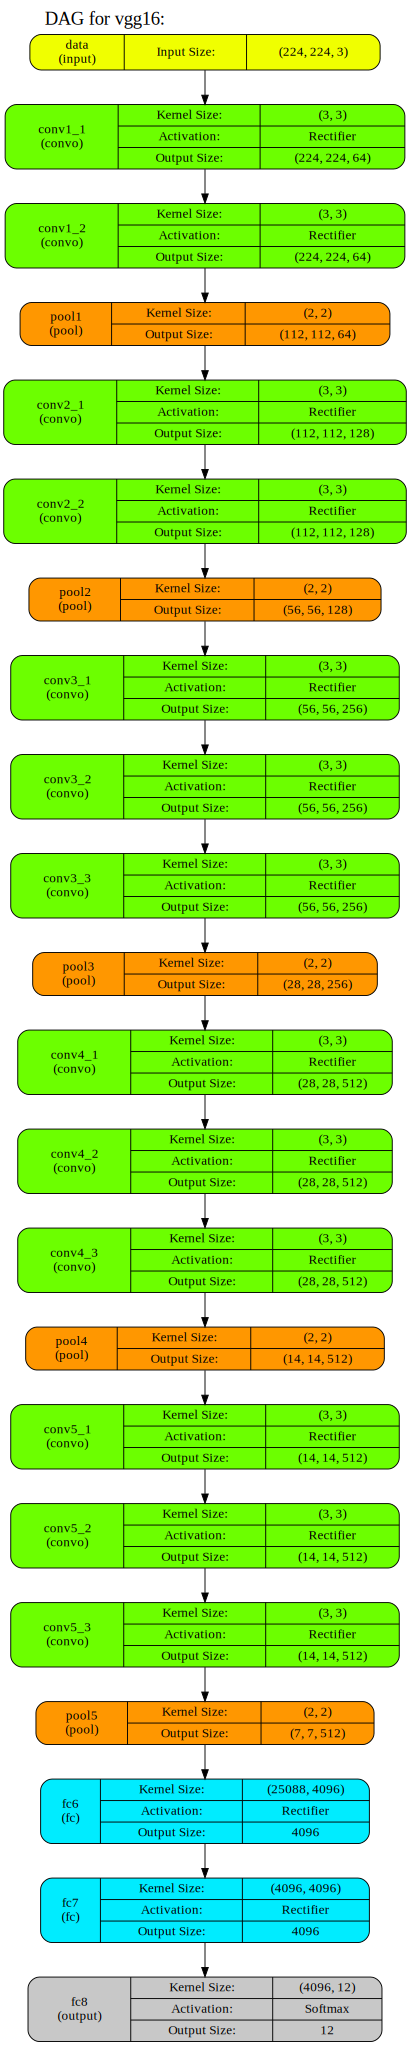

In [16]:
# Directed Acyclic Graph of Popular VGG16 Model Architecture
model_vgg16.plot_network()

In [23]:
model_vgg16.fit(data=train,
                mini_batch_size=32,
                max_epochs=20,
                lr=0.003,
                gpu=dict(devices=[0,1,2]), nthreads=3, log_level=2)

NOTE: Training based on existing weights.
NOTE:  The Synchronous mode is enabled.
NOTE:  The total number of parameters is 134268738.
NOTE:  The approximate memory cost is 1983.00 MB.
NOTE:  Loading weights cost       0.22 (s).
NOTE:  Initializing each layer cost       4.17 (s).
NOTE:  The total number of threads on each worker is 3.
NOTE:  The total number of minibatch size per thread on each worker is 32.
NOTE:  The maximum number of minibatch size across all workers for the synchronous mode is 96.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:      2
NOTE:  Levels for the target variable:
NOTE:  Level      0: malignant
NOTE:  Level      1: benign   
NOTE:  Number of input variables:     1
NOTE:  Number of numeric input variables:      1
NOTE:  Batch              nUsed   Learning Rate     Loss    Fit Error      Time (s) (Training)
NOTE:        0               96   0.003          0.9343      0.4479         1.11
NOTE:        1               96   0.003 

NOTE:        8               96   0.003          0.1921      0.0729         0.46
NOTE:        9               96   0.003          0.1433      0.0833         0.46
NOTE:       10               40   0.003          0.1302       0.025         0.27
NOTE:  Epoch           Learning Rate     Loss    Fit Error      Time (s)
NOTE:          6           0.003       0.2047      0.086         4.92
NOTE:  Batch              nUsed   Learning Rate     Loss    Fit Error      Time (s) (Training)
NOTE:        0               96   0.003          0.1717      0.0938         0.53
NOTE:        1               96   0.003          0.2812       0.125         0.46
NOTE:        2               96   0.003          0.2071      0.0938         0.46
NOTE:        3               96   0.003          0.2177      0.0833         0.46
NOTE:        4               96   0.003          0.1627      0.0833         0.46
NOTE:        5               96   0.003          0.1437      0.0521         0.46
NOTE:        6               96  

NOTE:         13           0.003       0.1205      0.052         4.96
NOTE:  Batch              nUsed   Learning Rate     Loss    Fit Error      Time (s) (Training)
NOTE:        0               96   0.003          0.0851      0.0313         0.54
NOTE:        1               96   0.003          0.1738      0.1042         0.46
NOTE:        2               96   0.003          0.1449      0.0521         0.46
NOTE:        3               96   0.003          0.1351      0.0417         0.46
NOTE:        4               96   0.003          0.0934      0.0313         0.46
NOTE:        5               96   0.003          0.0882      0.0313         0.46
NOTE:        6               96   0.003          0.0812      0.0208         0.46
NOTE:        7               96   0.003          0.1066      0.0625         0.46
NOTE:        8               96   0.003            0.11      0.0521         0.46
NOTE:        9               96   0.003           0.071      0.0104         0.46
NOTE:       10           

,Descr,Value
0,Model Name,vgg16
1,Model Type,Convolutional Neural Network
2,Number of Layers,22
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,13
6,Number of Pooling Layers,5
7,Number of Fully Connected Layers,2
8,Number of Weight Parameters,134256320
9,Number of Bias Parameters,12418


In [25]:
model_vgg16.predict(train)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read          1000
 1  Number of Observations Used          1000
 2  Misclassification Error (%)           1.3
 3                   Loss Error      0.039661

[OutputCasTables]

          casLib              Name  Rows  Columns  \
 0  CASUSER(sas)  Valid_Res_da6JvR  1000        8   
 
                                             casTable  
 0  CASTable('Valid_Res_da6JvR', caslib='CASUSER(s...  

+ Elapsed: 94.2s, user: 1.04e+03s, sys: 23.1s, mem: 9.5e+03mb

In [24]:
model_vgg16.predict(test)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read           400
 1  Number of Observations Used           400
 2  Misclassification Error (%)          12.5
 3                   Loss Error      0.465088

[OutputCasTables]

          casLib              Name  Rows  Columns  \
 0  CASUSER(sas)  Valid_Res_Vcx5F4   400        8   
 
                                             casTable  
 0  CASTable('Valid_Res_Vcx5F4', caslib='CASUSER(s...  

+ Elapsed: 41.5s, user: 419s, sys: 31.2s, mem: 9.47e+03mb

In [ ]:
s.close()